# Simple Liner Regression 직접 구현

In [2]:
import tensorflow as tf
import numpy as np

# Hypothesis and Cost
### Hypothesis 
$$ H(x) = Wx + b $$


### Cost
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$


In [3]:
X = tf.range(10.0)
y = tf.range(10.0)

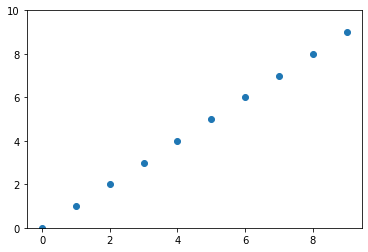

In [4]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'o')
plt.ylim(0, 10)
plt.show()

## Hypothesis

dtype에 유의

A. is not A (float / int)

In [5]:
vector = tf.range(10.0)
tf.reduce_mean(vector)

<tf.Tensor: shape=(), dtype=float32, numpy=4.5>

In [6]:
tf.square(5)

<tf.Tensor: shape=(), dtype=int32, numpy=25>

임의로 hypothesis 하나 생성

In [7]:
W = tf.Variable(1.0)
b = tf.Variable(1.0)


hypothesis = W * X + b

### Hypothesis 

$$ H(x) = 2.0x + 0.5 $$

In [8]:
hypothesis

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)>

In [9]:
hypothesis.numpy()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)

파란점이 실제 데이터, 빨간선이 H(x)

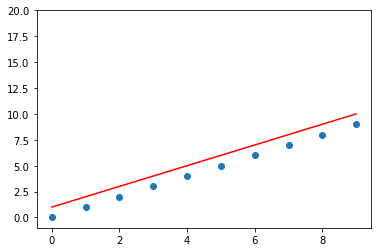

In [11]:
plt.plot(X, hypothesis.numpy(), 'r-')
plt.plot(X, y, 'o')
plt.ylim(-1, 20)
plt.show()

## Cost
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ { (W{ x }^{ i }-y^{ i } })^{ 2 } }  $$

Cost는 모델과 데이터가 얼마나 잘 맞지 않는지를 수치화하는 것이라 볼 수 있는데. 이는 loss라고 부른다.

자세한 내용은 [여기](https://github.com/cpprhtn/Cpprhtn-s_Deep_Learning/blob/master/AI_Class/018/README.md)를 참고하자.

오차제곱평균(MSE)

In [15]:
cost = tf.reduce_mean(tf.square(hypothesis - y))

#tensorflow에 미리 구현되어있는 MSE
cost2 = tf.losses.mean_squared_error(hypothesis, y)

cost, cost2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

## Gradient Descent

$$ Minimize cost(W, b) $$

파라미터  W ,  b 에 대해 Cost를 미분한다. 
다시 말해 파라미터를 증가시킬 때 Cost 값이 얼마나 변화하는지 확인한다.

In [16]:
with tf.GradientTape() as tape:
    hypothesis = W * X + b
    cost = tf.reduce_mean(tf.square(hypothesis - y))

dW, db = tape.gradient(cost, [W, b])
dW.numpy(), db.numpy()

(9.0, 2.0)

## 파라미터 업데이트

loss를  W로 미분했을 때 마이너스면  W 를 증가, 플러스면 감소시킨다. 

즉 미분값에 비례해서 변화시킨다.  
하지만 미분값만큼 그대로 변화시키면 파라미터가 한 번에 너무 많이 변하므로 적당한 학습률(보통 0.01~0.001)을 곱해준다.

In [18]:
learning_rate = 0.01

이제  w←w−η∂w 의 식으로 파라미터를 수정해준다.  η 는 학습률을 나타낸다. 
경사(미분)을 따라 손실을 줄여나가기 때문에 경사하강법이라고 부른다. 

텐서플로에서 a.assign_sub(b)는 일반적인 파이썬 코드에서 a = a - b와 같다

In [19]:
W.assign_sub(learning_rate * dW)
b.assign_sub(learning_rate * db)

W.numpy(), b.numpy()

(0.91, 0.98)

(-1.0, 20.0)

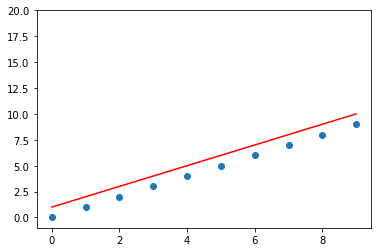

In [20]:
plt.plot(X, hypothesis.numpy(), 'r-')
plt.plot(X, y, 'o')
plt.ylim(-1, 20)

## 여러 번 반복

In [23]:
for i in range(1000):
    with tf.GradientTape() as tape:
        hypothesis = W * X + b
        cost = tf.reduce_mean(tf.square(hypothesis - y))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    0|    0.9997|    0.0019|  0.000001
   10|    0.9997|    0.0018|  0.000001
   20|    0.9997|    0.0017|  0.000001
   30|    0.9997|    0.0016|  0.000001
   40|    0.9998|    0.0015|  0.000001
   50|    0.9998|    0.0014|  0.000001
   60|    0.9998|    0.0014|  0.000001
   70|    0.9998|    0.0013|  0.000000
   80|    0.9998|    0.0012|  0.000000
   90|    0.9998|    0.0011|  0.000000
  100|    0.9998|    0.0011|  0.000000
  110|    0.9998|    0.0010|  0.000000
  120|    0.9998|    0.0010|  0.000000
  130|    0.9999|    0.0009|  0.000000
  140|    0.9999|    0.0009|  0.000000
  150|    0.9999|    0.0008|  0.000000
  160|    0.9999|    0.0008|  0.000000
  170|    0.9999|    0.0007|  0.000000
  180|    0.9999|    0.0007|  0.000000
  190|    0.9999|    0.0006|  0.000000
  200|    0.9999|    0.0006|  0.000000
  210|    0.9999|    0.0006|  0.000000
  220|    0.9999|    0.0005|  0.000000
  230|    0.9999|    0.0005|  0.000000
  240|    0.9999|    0.0005|  0.000000
  250|    0.9999|    0.00

(-1.0, 20.0)

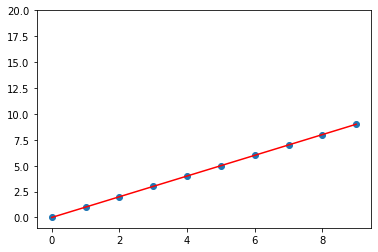

In [24]:
plt.plot(X, y, 'o')
plt.plot(X, hypothesis.numpy(), 'r-')
plt.ylim(-1, 20)

# predict

In [25]:
def pred_func(x):
    return W * x + b

In [28]:
print(pred_func(10))

tf.Tensor(9.999996, shape=(), dtype=float32)
